forecast_set:
[1106.37703331 1076.10928928 1023.688644   1064.44718154 1076.25095023
 1076.43309647 1095.28328165 1114.36236217 1117.93217788 1126.19793999
 1135.84164557 1132.6503767  1151.90893294 1167.66666744 1139.58045482
 1125.79867184 1091.80022657 1106.67731636 1117.6495257  1124.19090957
 1138.46959909 1153.03991555 1184.81759458 1189.40133205 1161.68534275
 1172.20486968 1174.03943354 1156.79124167 1121.94324473 1118.21213493
 1116.29276535 1073.52946779 1046.206134   1075.94741417 1025.16027631]
accuracy:  0.9768305338699217
froecast_out: 35


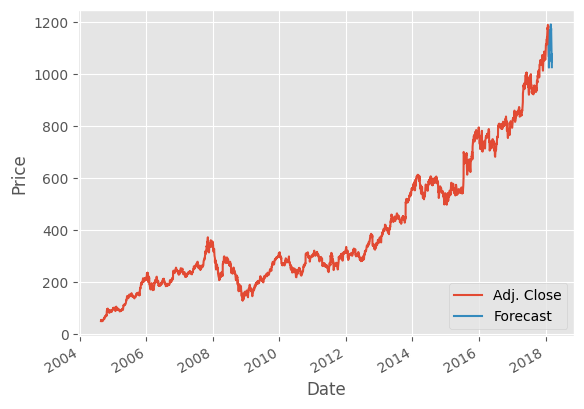

In [10]:
import pandas as pd
import nasdaqdatalink, math, datetime
import numpy as np
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib import style
import pickle
import pprint
style.use('ggplot')
pp = pprint.PrettyPrinter(indent=4)
df = nasdaqdatalink.get("WIKI/GOOGL")
#df = quandl.get("WIKI/GOOGL")
df = df[['Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume']]
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Close'])/df['Adj. Close'] * 100.0
df['PCT_change'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open'] * 100.0
df = df[['Adj. Close', 'HL_PCT', 'PCT_change', 'Adj. Volume']]
forecast_col = 'Adj. Close'
df.fillna(-99999, inplace=True)  # fiill in outlier
forecast_out = int(math.ceil(0.01*len(df)))  # Predict with 1% out the data
df['label'] = df[forecast_col].shift(-forecast_out)  
X = np.array(df.drop(['label'], axis=1))
X_scale = preprocessing.scale (X)
X = X_scale[:-forecast_out]
X_lately = X_scale[-forecast_out:]   
df.dropna (inplace=True)   # Drop any "NaN" rows
y = np.array(df['label'])
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.2)
clf = LinearRegression()
clf.fit(X_train, y_train)
with open('lnearregression.pickle', 'wb') as f: # We have the object data with pickle.
    pickle.dump (clf, f)
pickle_in = open('lnearregression.pickle', 'rb') # we read object f=with oickle
clf = pickle.load(pickle_in)
accuracy = clf.score(X_test, y_test)
forecast_set = clf.predict (X_lately)  # last 30 days
print('forecast_set:'); print(forecast_set)
print('accuracy: ', accuracy); print('froecast_out:', forecast_out)
df['Forecast'] = np.nan
last_date_all = df.iloc[-1]
last_date = df.iloc[-1].name  # row -1 (index of last row). "name" is attribute of API.
last_unix = last_date.timestamp()
one_day = 86400   # 60 x 60 x 24 = 86400sec
next_unix = last_unix + one_day  
for i in forecast_set:
    next_data = datetime.datetime.fromtimestamp (next_unix)
    next_unix += one_day
    df.loc[next_data] = [np.nan for _ in range(len(df.columns) -1)] + [i]
df['Adj. Close'].plot(); df['Forecast'].plot()
plt.legend(loc=4); plt.xlabel('Date')
plt.ylabel('Price'); plt.show()

forecast_set:
[1106.37703331 1076.10928928 1023.688644   1064.44718154 1076.25095023
 1076.43309647 1095.28328165 1114.36236217 1117.93217788 1126.19793999
 1135.84164557 1132.6503767  1151.90893294 1167.66666744 1139.58045482
 1125.79867184 1091.80022657 1106.67731636 1117.6495257  1124.19090957
 1138.46959909 1153.03991555 1184.81759458 1189.40133205 1161.68534275
 1172.20486968 1174.03943354 1156.79124167 1121.94324473 1118.21213493
 1116.29276535 1073.52946779 1046.206134   1075.94741417 1025.16027631]
accuracy:  0.9782141012121578
froecast_out: 35


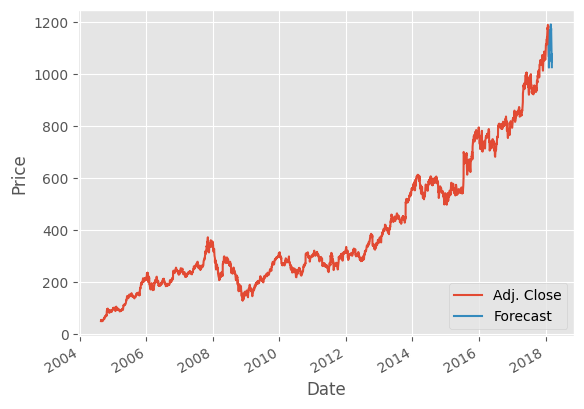

In [12]:
# now, we can just read the same object.
# We don't need to train and save. Just load the file by pickle.
import pandas as pd
import nasdaqdatalink, math, datetime
import numpy as np
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib import style
import pickle
import pprint
style.use('ggplot')
pp = pprint.PrettyPrinter(indent=4)
df = nasdaqdatalink.get("WIKI/GOOGL")
#df = quandl.get("WIKI/GOOGL")
df = df[['Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume']]
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Close'])/df['Adj. Close'] * 100.0
df['PCT_change'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open'] * 100.0
df = df[['Adj. Close', 'HL_PCT', 'PCT_change', 'Adj. Volume']]
forecast_col = 'Adj. Close'
df.fillna(-99999, inplace=True)  # fiill in outlier
forecast_out = int(math.ceil(0.01*len(df)))  # Predict with 1% out the data
df['label'] = df[forecast_col].shift(-forecast_out)  
X = np.array(df.drop(['label'], axis=1))
X_scale = preprocessing.scale (X)
X = X_scale[:-forecast_out]
X_lately = X_scale[-forecast_out:]   
df.dropna (inplace=True)   # Drop any "NaN" rows
y = np.array(df['label'])
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.2)
#clf = LinearRegression()
#clf.fit(X_train, y_train)
#with open('lnearregression.pickle', 'wb') as f:
#    pickle.dump (clf, f)
pickle_in = open('lnearregression.pickle', 'rb')
clf = pickle.load(pickle_in)
accuracy = clf.score(X_test, y_test)
forecast_set = clf.predict (X_lately)  # last 30 days
print('forecast_set:')
print(forecast_set)
print('accuracy: ', accuracy)
print('froecast_out:', forecast_out)
df['Forecast'] = np.nan
last_date_all = df.iloc[-1]
last_date = df.iloc[-1].name  # row -1 (index of last row). "name" is attribute of API.
last_unix = last_date.timestamp()
one_day = 86400   # 60 x 60 x 24 = 86400sec
next_unix = last_unix + one_day  
for i in forecast_set:
    next_data = datetime.datetime.fromtimestamp (next_unix)
    next_unix += one_day
    df.loc[next_data] = [np.nan for _ in range(len(df.columns) -1)] + [i]
df['Adj. Close'].plot(); df['Forecast'].plot()
plt.legend(loc=4); plt.xlabel('Date')
plt.ylabel('Price'); plt.show()